# Random Forest

In [32]:
from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report

import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = load_iris()
X = data.data
y = data.target

In [34]:
print(X.shape, y.shape)

(150, 4) (150,)


In [35]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [37]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=57)

# Scaling

In [39]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
model = RandomForestClassifier(n_estimators=4, random_state=57)

In [41]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4, random_state=57)

In [42]:
y_pred = model.predict(X_test)

In [43]:
model.score(X_test, y_test)

0.9777777777777777

In [44]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



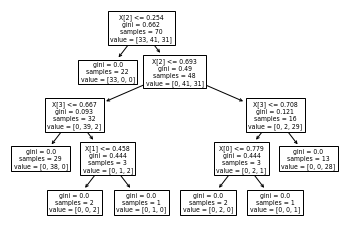

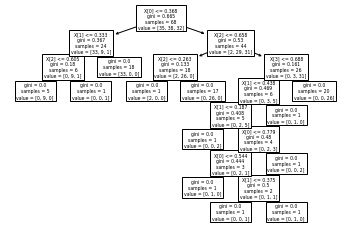

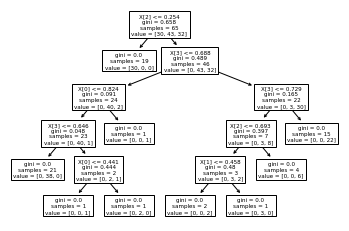

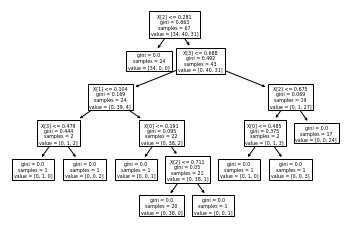

In [45]:
for i in range(0, model.n_estimators):
    plot_tree(model.estimators_[i])
    plt.show()